In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import csv file 
df = pd.read_csv(r"C:\Users\princi\OneDrive\Documents\superstore_final_dataset (1).csv" ,encoding='unicode_escape')

This code returns the number of rows and columns in the dataframe.

In [29]:
df.shape

(1500, 16)

This code displays the first 5 rows of the dataframe.

In [30]:
df.head

<bound method NDFrame.head of       Row_ID        Order_ID  Order_Date       Ship_Mode Customer_ID  \
0        1.0  CA-2017-152156  08-11-2017    Second Class    CG-12520   
1        2.0  CA-2017-152156  08-11-2017    Second Class    CG-12520   
2        3.0  CA-2017-138688  12-06-2017    Second Class    DV-13045   
3        4.0  US-2016-108966  11-10-2016  Standard Class    SO-20335   
4        5.0  US-2016-108966  11-10-2016  Standard Class    SO-20335   
...      ...             ...         ...             ...         ...   
1495  1496.0  CA-2018-152485  04-09-2018  Standard Class    JD-15790   
1496  1497.0  CA-2018-152485  04-09-2018  Standard Class    JD-15790   
1497  1498.0  CA-2018-152485  04-09-2018  Standard Class    JD-15790   
1498  1499.0  CA-2017-141586  17-10-2017     First Class    NK-18490   
1499     NaN             NaN         NaN             NaN         NaN   

        Customer_Name        Country       State  Postal_Code  \
0         Claire Gute  United States    

This code displays a summary of the dataframe, including column names, data types, non-null counts, and memory usage.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         1499 non-null   float64
 1   Order_ID       1499 non-null   object 
 2   Order_Date     1499 non-null   object 
 3   Ship_Mode      1499 non-null   object 
 4   Customer_ID    1499 non-null   object 
 5   Customer_Name  1499 non-null   object 
 6   Country        1499 non-null   object 
 7   State          1499 non-null   object 
 8   Postal_Code    1499 non-null   float64
 9   Product_ID     1499 non-null   object 
 10  Category       1499 non-null   object 
 11  Product_Name   1499 non-null   object 
 12  Sales          1499 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
dtypes: float64(6), object(10)
memory usage: 187.6+ KB


This code checks for missing (null) values in each column of the dataframe and returns the total number of null values per column.

In [32]:
pd.isnull(df).sum()

Row_ID              1
Order_ID            1
Order_Date          1
Ship_Mode           1
Customer_ID         1
Customer_Name       1
Country             1
State               1
Postal_Code         1
Product_ID          1
Category            1
Product_Name        1
Sales               1
Unnamed: 13      1500
Unnamed: 14      1500
Unnamed: 15      1500
dtype: int64

This code removes all rows with missing (NaN) values from the dataframe permanently.

In [33]:
df.dropna(inplace=True)

This code renames the column **'Customer_Name'** to **'Buyer_Name'** in the dataframe.

In [34]:
df.rename(columns={'Customer_Name':'Buyer_Name'})

,Row_ID,Order_ID,Order_Date,Ship_Mode,Customer_ID,Buyer_Name,Country,State,Postal_Code,Product_ID,Category,Product_Name,Sales,Unnamed: 13,Unnamed: 14,Unnamed: 15


This code generates descriptive statistics (such as count, mean, standard deviation, minimum, and maximum) for all numerical columns in the dataset.

In [35]:
df.describe()

,Row_ID,Postal_Code,Sales,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


This code generates descriptive statistics (like count, mean, standard deviation, minimum, and maximum) for the Category and Sales columns.

In [36]:
df[['Category','Sales']].describe()

,Sales
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


This code loads the dataset, calculates total sales for each category, and displays the results in a bar chart.

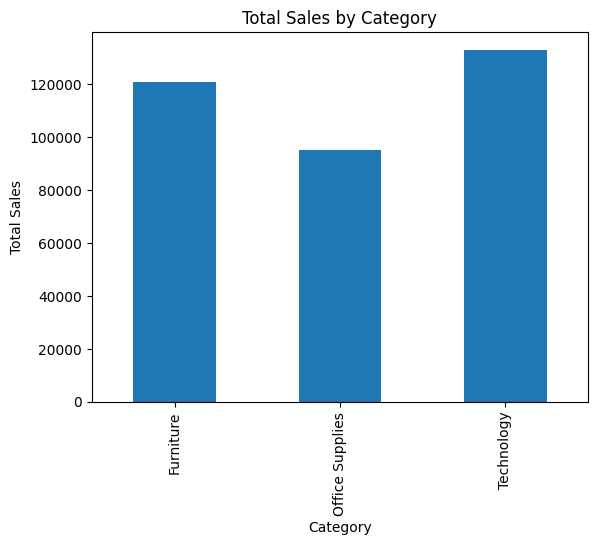

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\princi\OneDrive\Documents\superstore_final_dataset (1).csv", encoding='latin1')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

category_sales = df.groupby("Category")["Sales"].sum()

plt.figure()
category_sales.plot(kind='bar')

plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")

plt.show()


This code calculates total sales by state, selects the top 10 states with the highest sales, and displays them in a bar char

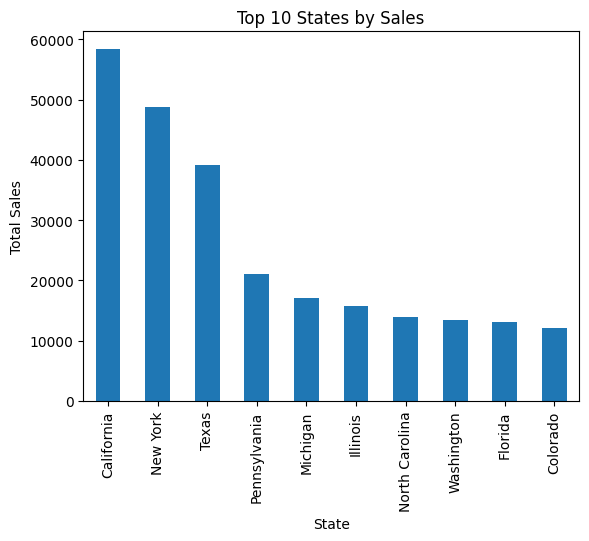

In [39]:
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure()
state_sales.plot(kind='bar')

plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")

plt.show()


This code creates a histogram to show the distribution of sales values and displays their frequency.

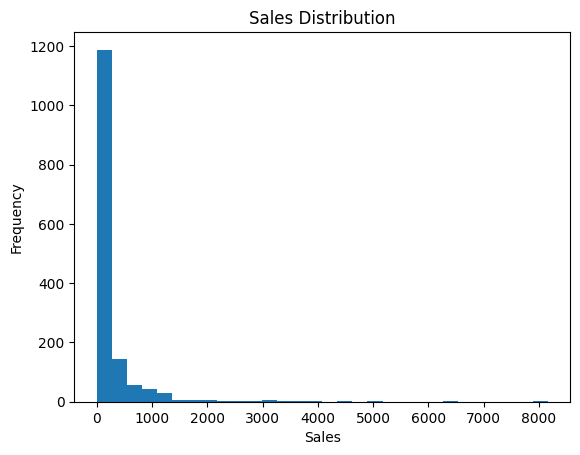

In [40]:
plt.figure()
plt.hist(df["Sales"], bins=30)

plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")

plt.show()


This code converts the order date to month format, calculates total sales for each month, and displays the monthly sales trend in a line chart.

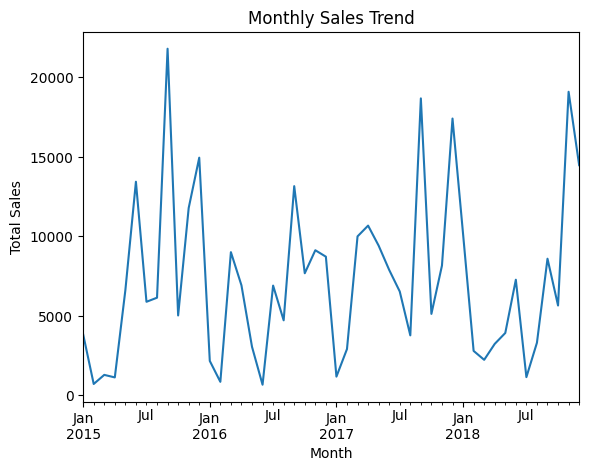

In [41]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True)

df["Month"] = df["Order_Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure()
monthly_sales.plot()

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")

plt.show()


This code groups the data by ship mode, calculates total sales for each mode, and displays the results in a bar chart.

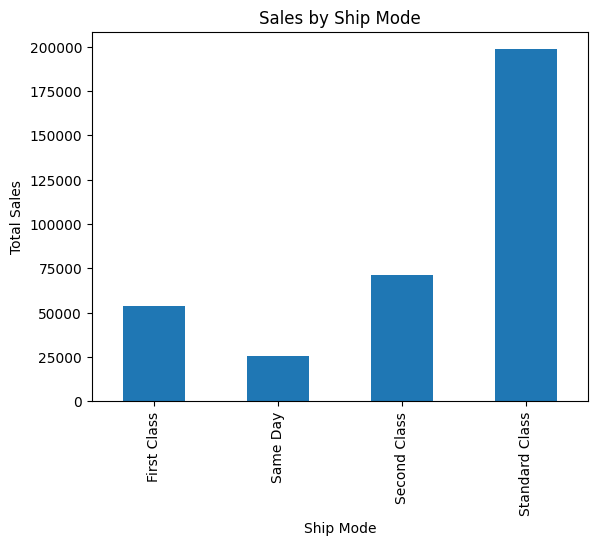

In [45]:
ship_sales = df.groupby("Ship_Mode")["Sales"].sum()

plt.figure()
ship_sales.plot(kind='bar')

plt.title("Sales by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")

plt.show()


This code calculates total sales by state, selects the top 5 states with the highest sales, and displays them in a pie chart.

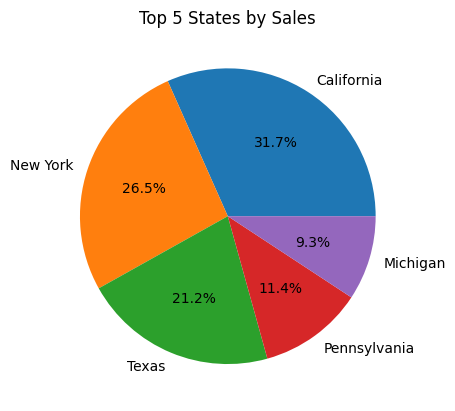

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

top5_states = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(5)

plt.figure()
plt.pie(top5_states, labels=top5_states.index, autopct='%1.1f%%')

plt.title("Top 5 States by Sales")

plt.show()
